### Problem: Does intervention increase HIV knowledge?

Early in the HIV epidemic, there was poor knowledge of HIV transmission risks among health care staff. A short training was developed to improve knowledge and attitudes around HIV disease. Was the training effective in improving knowledge?

Ho: There is no real difference in the average HIV knowledge scores of health care staff before and after the intervention. 

Ha: There is a real difference in the average HIV knowledge scores of health care staff before and after the intervention.

In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy.stats as stats
import pingouin as pg

In [3]:
# Load the data

hiv_kscores = pd.read_csv('HIV Knowledge Scores.csv', index_col='Subject')
hiv_kscores

,Kscore_before,Kscore_after,difference
Subject,,,
1,17,22,5
2,17,21,4
3,15,21,6
4,19,26,7
5,18,20,2
6,14,14,0
7,27,31,4
8,20,18,-2
9,12,22,10


### Check for independence and normality conditions

1. Independence - If a random sampling method was used (such as simple random sampling) then we can assume that each observation is independent of every other observation.
2. Normality - the differences between the pairs should be approximately normally distributed. There are no extreme outliers in the data.

Text(0.5, 1.0, 'Histogram of Paired Differences')

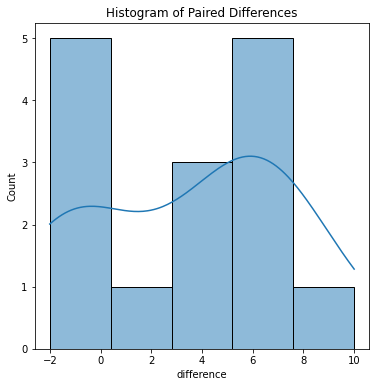

In [4]:
### Plot a histogram of the difference in HIV knowledge scores for each person sampled.

plt.figure(figsize=(6,6))
sns.histplot(data=hiv_kscores['difference'], kde=True)
plt.title('Histogram of Paired Differences')

Text(0.5, 1.0, 'Boxplot of Paired Differences')

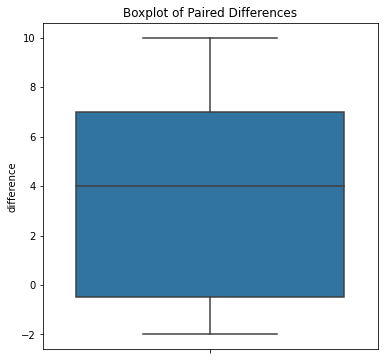

In [6]:
### Plot a boxplot of the difference in HIV knowledge scores for each person sampled.

plt.figure(figsize=(6,6))
sns.boxplot(y=hiv_kscores['difference'])
plt.title('Boxplot of Paired Differences')

The observations are based on a simple random sample, so independence is reasonable. There are also no outliers observed, so the normality condition is satisfied. With these conditions satisfied, we can move forward with the t-distribution.

### Summary statistics for the knowledge scores before, after and their difference

In [7]:
for col in hiv_kscores.columns:
    print(f'\nSummary statistics for {col}:\n')
    print('Sample size:', len(hiv_kscores[col]))
    print('Mean:', hiv_kscores[col].mean())
    print('Standard deviation:', statistics.stdev(hiv_kscores[col]))


Summary statistics for Kscore_before:

Sample size: 15
Mean: 18.333333333333332
Standard deviation: 3.773340063934768

Summary statistics for Kscore_after:

Sample size: 15
Mean: 21.866666666666667
Standard deviation: 4.389381125701739

Summary statistics for difference:

Sample size: 15
Mean: 3.533333333333333
Standard deviation: 3.925496632214045


### Perform paired t-test using scipy

In [8]:
kscores_before = hiv_kscores['Kscore_before']
kscores_after = hiv_kscores['Kscore_after']

In [9]:
stats.ttest_rel(a=kscores_after, b=kscores_before, alternative='two-sided')

Ttest_relResult(statistic=3.4860662073428483, pvalue=0.0036344776518329644)

### Perform paired t-test using Pingouin

In [10]:
pg.ttest(x=kscores_after, y=kscores_before, paired=True, alternative='two-sided', correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.486066,14,two-sided,0.003634,"[1.36, 5.71]",0.863269,12.927,0.874301


### Interpret the results in the context of data

Because the p-value of 0.003 is smaller than 0.05, the data provides a strong evidence to reject the null hypothesis. There is a real difference in the average HIV knowledge scores before and after the intervention. Because the mean score after the intervention is higher than before the intervention, we can conclude that the intervention is effective in improving the knowledge about HIV among health care staff. 

We are 95% confident that the intervention increased the average HIV knowledge scores of health care staff by 1.36 to 5.71 points.